In [7]:
from scipy.stats import expon as ex
import matplotlib.pyplot as plt
from scipy.stats import uniform as un
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ЗАДАЧА 1

In [8]:
n = 100
ar_t = ex(scale = 1/3).rvs(size = n)
arrival_times = []
for i in range(n):
    if i == 0:
        arrival_times.append(ar_t[i])
    else:
        arrival_times.append(ar_t[i]+arrival_times[i-1])

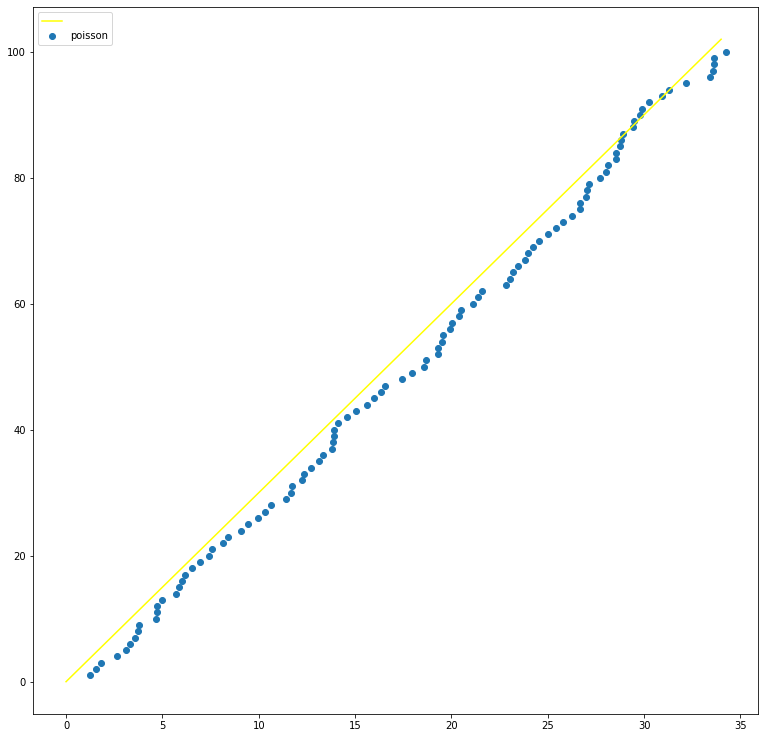

In [9]:
plt.figure(figsize = (13,13))
plt.scatter(arrival_times,range(1,n+1),label = 'poisson')
a = [ i for i in range(int(max(arrival_times))+1)]
b = [ 3*i for i in range(int(max(arrival_times))+1)]
plt.plot(a,b,color = 'yellow',label = ' ')
plt.legend()
plt.show()

# ЗАДАЧА 2

In [10]:
n = 100
lamb = 3

In [11]:
def found_pose(a,b,n):
    for i in range(n):
        if a < b[i]:
            if i == 0:
                return b[i] - a, a
            if i != 0:
                return b[i] - a, a - b[i-1]

Средние для времени следующего автобуса, прошлого 0.3103302257246108 0.33162882686400197


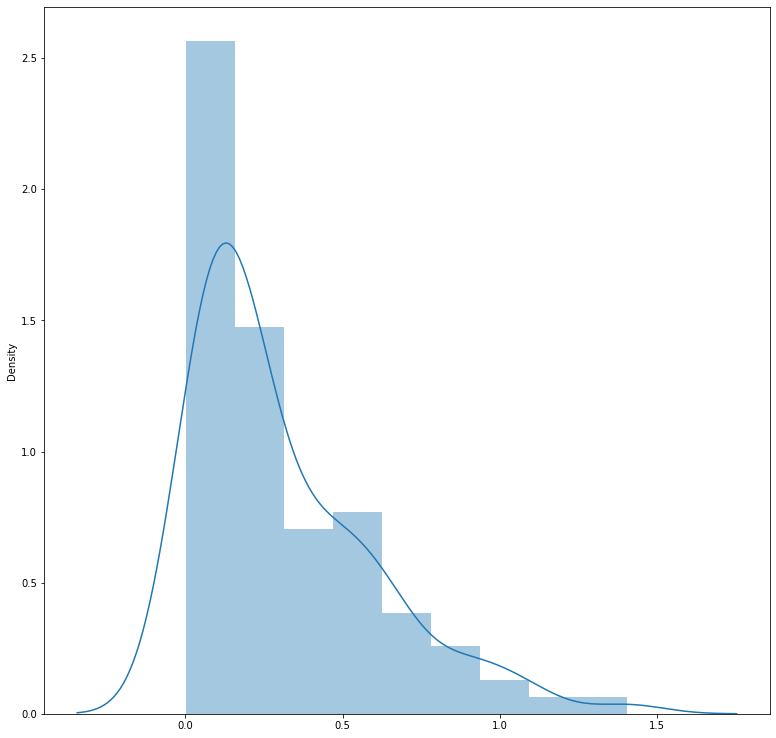

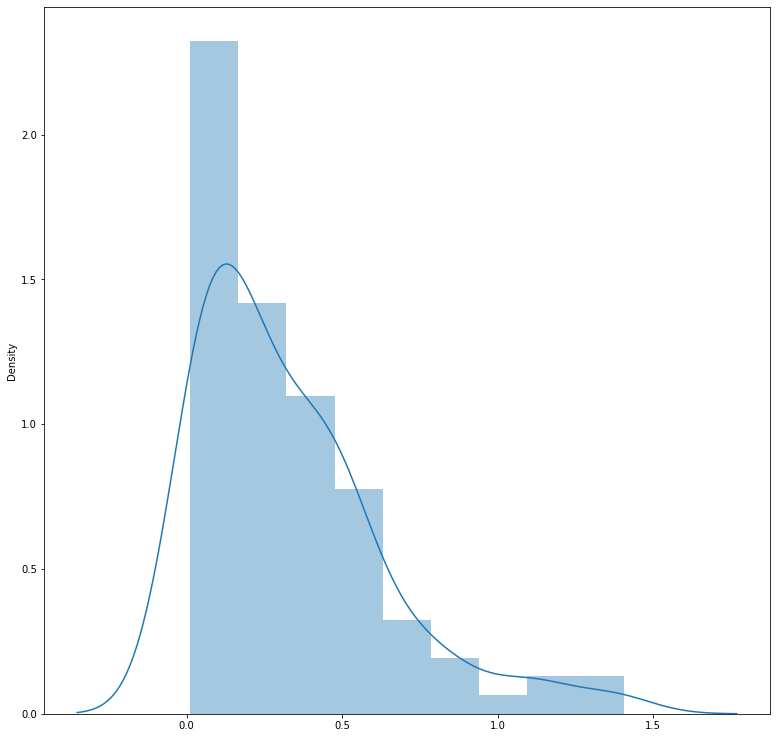

In [12]:
Arina = un.rvs(size = n)
auto_wait = []
auto_prev = []
for j in range(n):
    ar_t = ex(scale = 1/lamb).rvs(size = n)
    arrival_times = []
    for i in range(n):
        if i == 0:
            arrival_times.append(ar_t[i])
        else:
            arrival_times.append(ar_t[i]+arrival_times[i-1])
    w1, w2 = found_pose(Arina[j]*max(arrival_times),arrival_times,n)
    auto_wait.append(w1)
    auto_prev.append(w2)
print('Средние для времени следующего автобуса, прошлого',np.mean(auto_wait),np.mean(auto_prev))
plt.figure(figsize=(13,13))
sns.distplot(auto_wait)
plt.show()
plt.figure(figsize=(13,13))
sns.distplot(auto_prev)
plt.show()

## Если Арина приходит в одно и тоже время

In [13]:
Arina = un.rvs(size = 1)
auto_wait1 = []
auto_prev1 = []
for j in range(n):
    ar_t = ex(scale = 1/lamb).rvs(size = n)
    arrival_times = []
    for i in range(n):
        if i == 0:
            arrival_times.append(ar_t[i])
        else:
            arrival_times.append(ar_t[i]+arrival_times[i-1])
    w1, w2 = found_pose(Arina*max(arrival_times),arrival_times,n)
    auto_wait1.append(w1)
    auto_prev1.append(w2)
print('Средние для времени следующего автобуса, прошлого',np.mean(auto_wait),np.mean(auto_prev))

Средние для времени следующего автобуса, прошлого 0.3103302257246108 0.33162882686400197


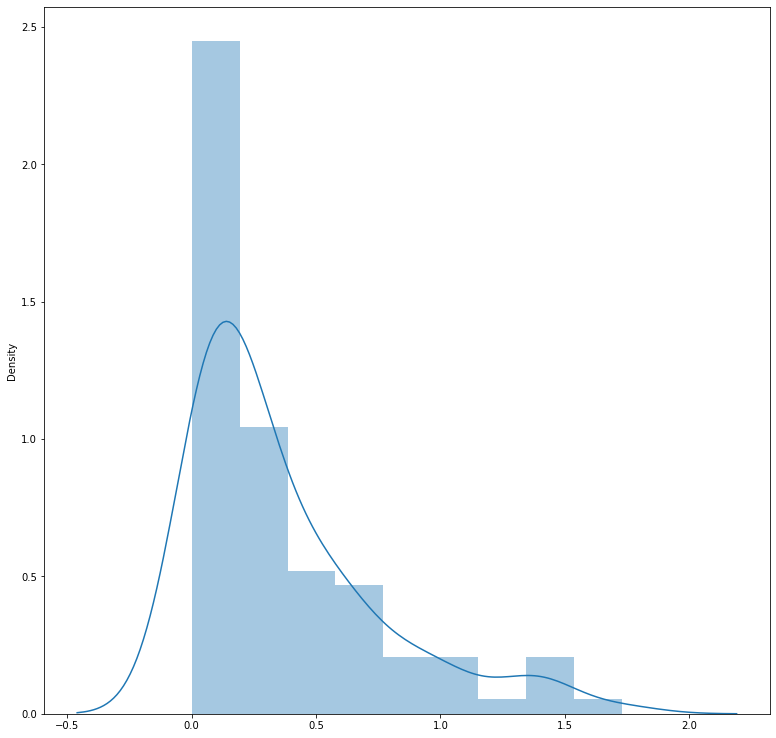

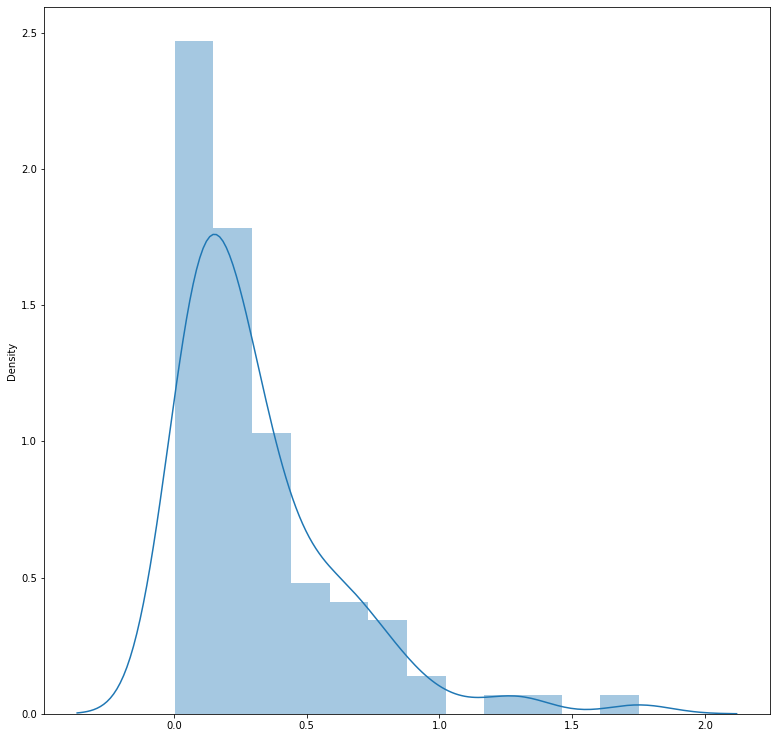

In [14]:
plt.figure(figsize =(13,13))
sns.distplot(auto_wait1)
plt.show()
plt.figure(figsize =(13,13))
sns.distplot(auto_prev1)
plt.show()